In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/refs/heads/master/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:, 2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
327,42,75000,0
95,35,44000,0
85,31,118000,1
137,30,107000,1
291,49,89000,1


If you apply scaling before splitting, the scaler will compute the mean and standard deviation (or min-max values) using the entire dataset (both training and test data).

This means the test data information is "leaked" into the training process, leading to overfitting and overly optimistic performance.

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set
# we fit the scaler on training data and transform both train and test data with that scaler
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

#### Standard Scaler takes DF as input and returns numpy array as output

In [14]:
X_train_scaled[1 : 10]

array([[ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285]])

#### Converting X_train_scaled and X_test_scaled back to DF

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [36]:

np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [38]:

np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

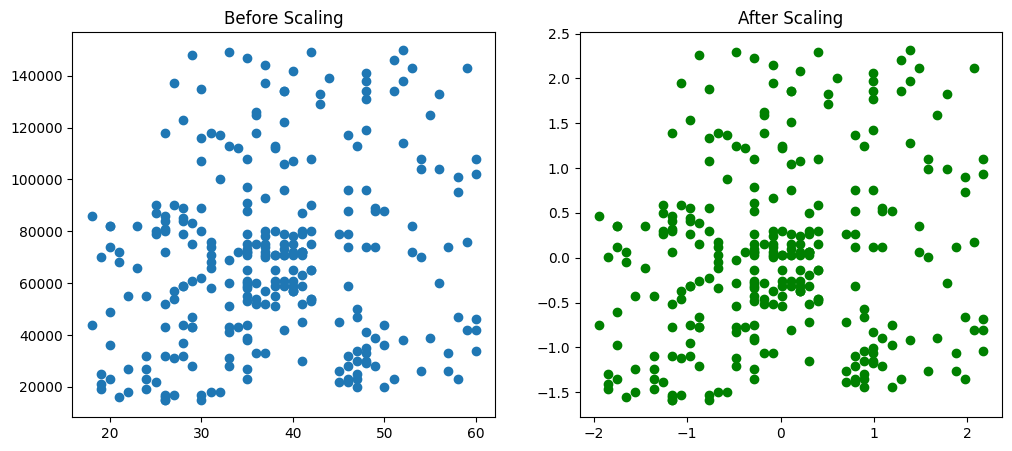

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(data = X_train, x = 'Age', y = 'EstimatedSalary')
ax1.set_title('Before Scaling')

ax2.scatter(data = X_train_scaled, x = 'Age', y = 'EstimatedSalary', color='green')
ax2.set_title('After Scaling')

plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

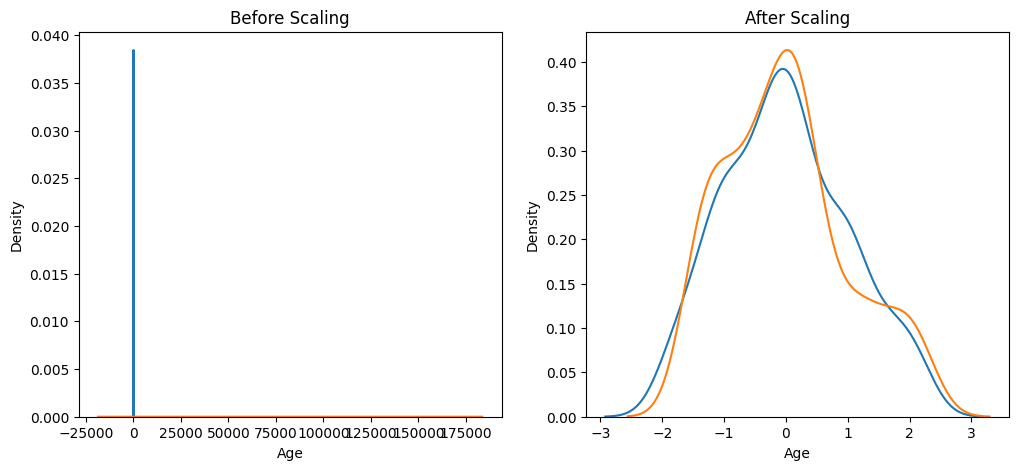

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')

sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title('After Scaling')

sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

<Axes: title={'center': 'Age Distribution After Scaling'}, xlabel='Age', ylabel='Density'>

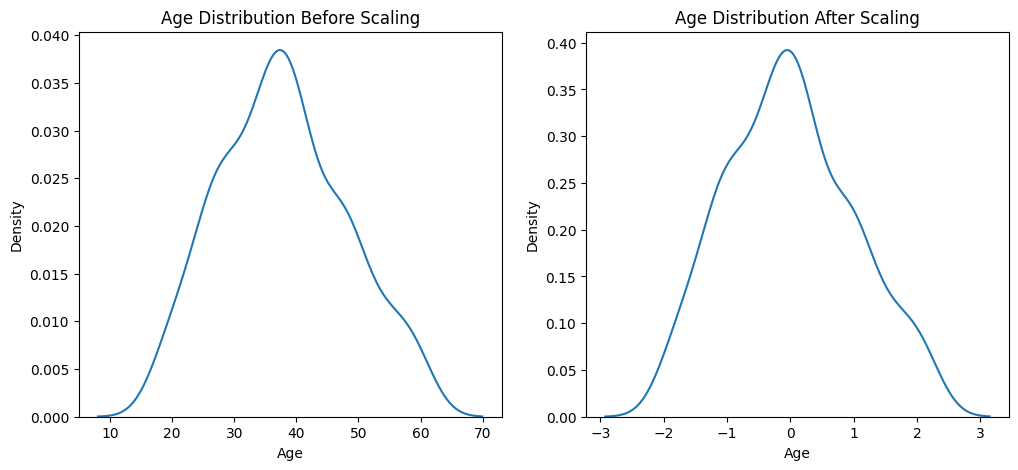

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)


## Why Scaling is Important ?

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [30]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score

In [35]:
print("Actual", accuracy_score(Y_test, y_pred))
print("Scaled", accuracy_score(Y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


## Decision TRee

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [43]:
print("Actual", accuracy_score(Y_test, y_pred))
print("Scaled", accuracy_score(Y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


In [44]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outliers


#### inducing outliers to study effects

In [50]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [51]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


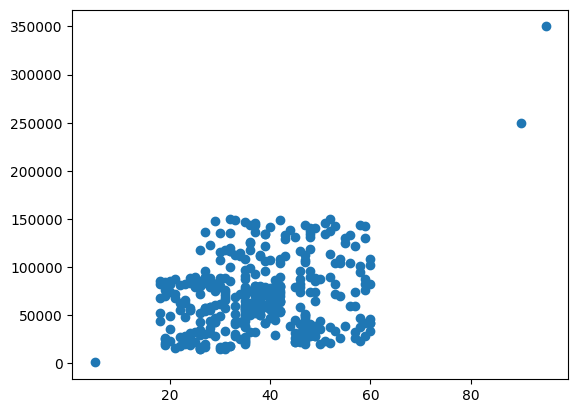

In [52]:
plt.scatter(data = df, x = 'Age', y = 'EstimatedSalary')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming training data
X_train_scaled = scaler.fit_transform(X_train)

# scaling test data
X_test_scaled = scaler.transform(X_test)

#### Converting scaled features back to dataframe

In [55]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

#### Outliers are still there even in the scaled data, therefore they have to be handled separately as `Standardisation` doesnt resolve effect of Outliers

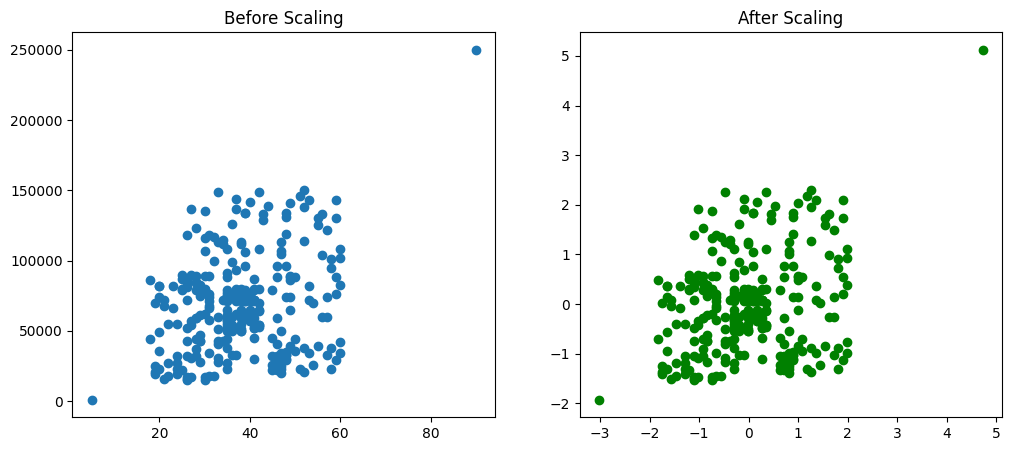

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(data = X_train, x = 'Age', y = 'EstimatedSalary')
ax1.set_title('Before Scaling')

ax2.scatter(data = X_train_scaled, x = 'Age', y = 'EstimatedSalary', color='green')
ax2.set_title('After Scaling')

plt.show()

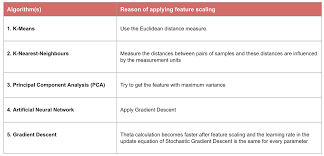